# Pymaceuticals Inc.
---

## Analysis
* This is a great spot to put your final analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random as random
from scipy.stats import linregress
random.seed(0)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
print(
    len(mouse_metadata)
)

print(
    len(mouse_metadata['Mouse ID'].unique())
)
mouse_metadata.head()


249
249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
len(study_results) 

1893

In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
d = pd.merge(study_results, mouse_metadata, how='left', on = 'Mouse ID')

# Combine the data into a single dataset

# Display the data table for preview
len(d)
d.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice.
n = len(d['Mouse ID'].unique())
print('There are {0} mice'.format(n))

There are 249 mice


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
g = study_results.groupby(['Mouse ID','Timepoint']).count()

h = g.loc[g['Metastatic Sites'] > 1]
print(
    len(h)
)
dupl_id = h.index[0][0]
dupl_id

5


'g989'

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
d.loc[d['Mouse ID'] == dupl_id]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = d.copy()
data = data.loc[data['Mouse ID'] != dupl_id]
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice in the clean DataFrame.
print('There are {0} mice for which we have data points after removing duplicated id.'.format(
    len(data['Mouse ID'].unique())))

There are 248 mice for which we have data points after removing duplicated id.


## Summary Statistics

In [11]:
x = data.groupby('Drug Regimen')
y = x['Tumor Volume (mm3)'].describe()
z = x['Tumor Volume (mm3)'].median()
y['median'] = z
y['variance'] = y['std']**2
y

#could have use GroupBy.agg('mean',...)

,count,mean,std,min,25%,50%,75%,max,median,variance
Drug Regimen,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,41.557809,24.947764
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,51.776157,39.290177
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,51.820584,43.128684
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,53.698743,68.553577
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,52.509285,66.173479
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,52.288934,61.168083
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421,50.446266,43.852013
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,40.673236,23.486704
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,52.431737,59.450562


In [12]:
z = y.loc[y['min'] < 45]
z

,count,mean,std,min,25%,50%,75%,max,median,variance
Drug Regimen,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,41.557809,24.947764
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,51.820584,43.128684
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,40.673236,23.486704


In [13]:
z.index
print('The drugs {0}, {1}, and {2} were the only drugs that showed a decrease in tumor size.'.format(
z.index[0],z.index[1],z.index[2]))
print('How did we get the mice to all start with the same size tumors?')

The drugs Capomulin, Infubinol, and Ramicane were the only drugs that showed a decrease in tumor size.
How did we get the mice to all start with the same size tumors?


In [14]:
y['std err'] = x['Tumor Volume (mm3)'].sem()

In [15]:
y

,count,mean,std,min,25%,50%,75%,max,median,variance,std err
Drug Regimen,,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,41.557809,24.947764,0.329346
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,51.776157,39.290177,0.469821
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,51.820584,43.128684,0.492236
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,53.698743,68.553577,0.603860
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,52.509285,66.173479,0.596466
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,52.288934,61.168083,0.581331
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421,50.446266,43.852013,0.544332
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,40.673236,23.486704,0.320955
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,52.431737,59.450562,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
z = pd.DataFrame()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
#Mean Tumor Volume/      Median Tumor Volume/      Tumor Volume Variance/      Tumor Volume Std. Dev./      Tumor Volume Std. Err.
z['Mean Tumor Volume'] = y['mean']
z['Median Tumor Volume'] = y['median']
z['Tumor Volume Variance'] = y['variance']
z['Tumor Volume Std. Dev.'] = y['std']
z['Tumor Volume Std. Err.'] = y['std err']
z
#Infubinol      52.884795      51.820584      43.128684      6.567243      0.492236

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

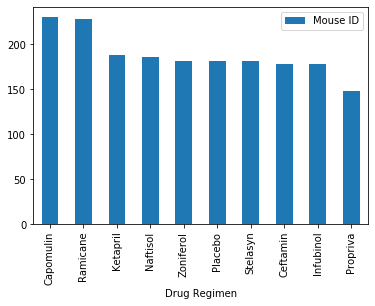

In [18]:
c = x.count()
mbt = pd.DataFrame(c['Mouse ID'])
mbt.sort_values(by = 'Mouse ID', ascending = False, inplace = True)
mbt.plot(kind = 'bar')

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


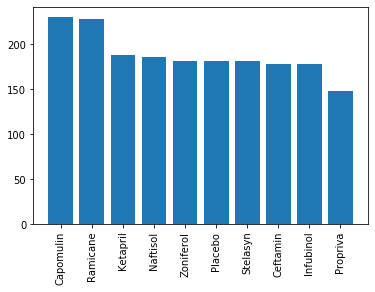

In [20]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(mbt.index,mbt['Mouse ID'])
plt.xticks(rotation=90)
plt.show()

#actually shows # of data points

In [21]:
mbs = pd.DataFrame(data.groupby('Sex')['Mouse ID'].count())
mbs = mbs.rename(columns={'Mouse ID':'Sex'})
mbs.index.name = None
mbs = mbs.sort_values('Sex',ascending=False)
mbs

,Sex
Male,958
Female,922


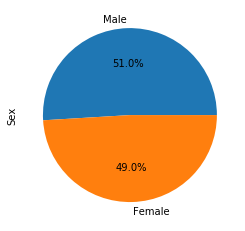

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mbs.plot(kind='pie',y='Sex',legend=False,autopct='%1.1f%%')
plt.show()

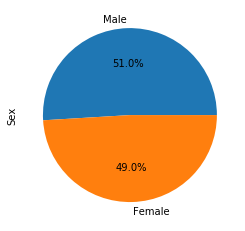

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mbs.Sex,labels=mbs.index,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
l = data.groupby('Mouse ID').last()
l = l[l['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
l

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a275,45,62.999356,3,Ceftamin,Female,20,28
a411,45,38.407618,1,Ramicane,Male,3,22
a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...
y769,45,68.594745,4,Ceftamin,Female,6,27
y793,45,31.896238,2,Capomulin,Male,17,17
y865,45,64.729837,3,Ceftamin,Male,23,26


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
fts = pd.DataFrame()
for drug in drugs:
    fts[drug] = l[l['Drug Regimen'] == drug]['Tumor Volume (mm3)'].values

fts
#strangely, these four were all tested on the same # of mice

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capq = fts.Capomulin.quantile([.25,.5,.75])
ramq = fts.Ramicane.quantile([.25,.5,.75])
infq = fts.Infubinol.quantile([.25,.5,.75])
cefq = fts.Ceftamin.quantile([.25,.5,.75])
#print(capq,'\n',ramq,'\n',infq,'\n',cefq)
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
cap_iqr = capq[0.75] - capq[0.25]
ram_iqr = ramq[0.75] - ramq[0.25]
inf_iqr = infq[0.75] - infq[0.25]
cef_iqr = cefq[0.75] - cefq[0.25]

cap_max = capq[0.5]+(1.5*cap_iqr)
cap_min = capq[0.5]-(1.5*cap_iqr)


ram_max = ramq[0.5]+(1.5*ram_iqr)
ram_min = ramq[0.5]-(1.5*ram_iqr)


inf_max = infq[0.5]+(1.5*inf_iqr)
inf_min = infq[0.5]-(1.5*inf_iqr)


cef_max = cefq[0.5]+(1.5*cef_iqr)
cef_min = cefq[0.5]-(1.5*cef_iqr)

outliers = [
    fts.Capomulin[fts.Capomulin > cap_max],
    fts.Capomulin[fts.Capomulin < cap_min],
    fts.Ramicane[fts.Ramicane > ram_max],
    fts.Ramicane[fts.Ramicane < ram_min],
    fts.Infubinol[fts.Infubinol > inf_max],
    fts.Infubinol[fts.Infubinol < inf_min],
    fts.Ceftamin[fts.Ceftamin > cef_max],
    fts.Ceftamin[fts.Ceftamin < cef_min]
]
outliers

[Series([], Name: Capomulin, dtype: float64),
 16    23.343598
 Name: Capomulin, dtype: float64,
 Series([], Name: Ramicane, dtype: float64),
 13    22.050126
 Name: Ramicane, dtype: float64,
 Series([], Name: Infubinol, dtype: float64),
 5    36.321346
 Name: Infubinol, dtype: float64,
 Series([], Name: Ceftamin, dtype: float64),
 Series([], Name: Ceftamin, dtype: float64)]

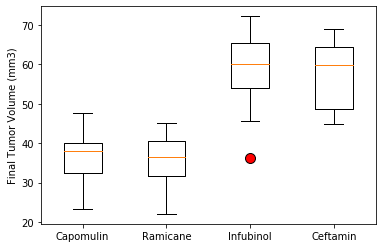

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
bp = ax1.boxplot(fts.T)#, patch_artist=True)
plt.xticks(ticks=(range(1,5)),labels=drugs)
for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor='r', markersize=10)
plt.show()



## Line and Scatter Plots

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
dd = data[data['Drug Regimen'] == 'Capomulin'][['Mouse ID','Tumor Volume (mm3)','Weight (g)','Timepoint']]
mouse = random.choice(dd['Mouse ID'].unique())
mouse
one_mouse_data = dd[dd['Mouse ID'] == mouse]
one_mouse_data

,Mouse ID,Tumor Volume (mm3),Weight (g),Timepoint
237,w914,45.000000,21,0
309,w914,45.893720,21,5
645,w914,43.231963,21,10
873,w914,43.688449,21,15
983,w914,41.108092,21,20
1181,w914,40.291917,21,25
1356,w914,40.993110,21,30
1494,w914,41.664916,21,35
1732,w914,35.611309,21,40
1838,w914,36.041047,21,45


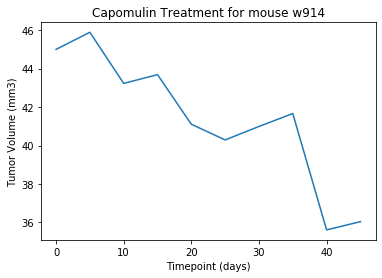

In [28]:
plt.plot(one_mouse_data['Timepoint'],one_mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment for mouse {mouse}')
plt.show()

In [29]:
cc = data[data['Drug Regimen'] == 'Capomulin'][['Mouse ID','Tumor Volume (mm3)','Weight (g)']].groupby('Mouse ID').mean()
cc

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


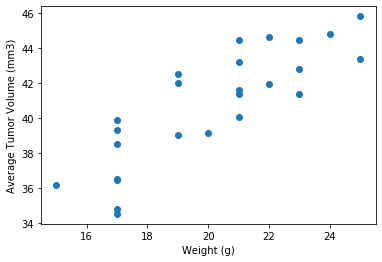

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(cc['Weight (g)'],cc['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

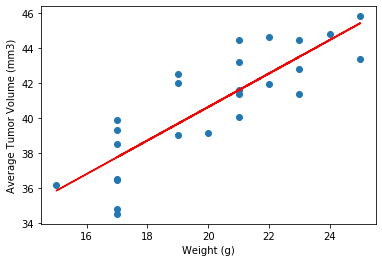

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cc['Weight (g)']
y_values = cc['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope*x_values + intercept
plt.scatter(cc['Weight (g)'],cc['Tumor Volume (mm3)'])
plt.plot(x_values,regress_values,'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [34]:
print(f'The correlation between weight and average tumor volume is {round(rvalue,3)}')

The correlation between weight and tumor volume is 0.842
